<a href="https://colab.research.google.com/github/shantanu-unh/Ocean_Plastic_Pollution/blob/master/Adv_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Our Group is composed of:
# Shantanu Suryawanshi
# Jafitha Johnson
# Pranay Reddy

In [ ]:
# Things to do
# Suggest good Dataset = Done


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Reading Dataset in Dataframe
df = pd.read_csv('https://github.com/shantanu-unh/Ocean_Plastic_Pollution/raw/master/Dataset/Ocean_Dataset.csv')
df.tail()

,Unnamed: 0,FID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,COUNTRYAFF,CONTINENT,OBJECTID,COUNTRY,TotalEvents2015_2018,TotalLengthCleanup_m,AvgLengthCleanup_m,TotalVolunteers,TotalDebrisltemsRecovered,TotalPlasticFoamFishingItemsRec,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,Plastic_Beverage_Bottle,Other_Plastic_Bottle,PlasticBottleCapOrLid,Plastic_FoamFoodContainer,BucketOrCrate,PlasticLighter,OtherHardPlastic,PlasticOrFoamPlatesCupsSilverwa,PlasticPersonalCareProduct,LollipopStickOrEarBud,PlasticBag,WrapperOrLabel,PlasticSheet,PlasticDrinkingStraw,OtherSoftPlastic,CigaretteButts,StringRingRibbon,PlasticStraps,FishingNet,FishingLineLureRope,FishingGlowSticks,BuoysAndFloats,OtherPlasticFishingDebris,OtherFoamPlasticDebris,OtherPlasticDebris
301,148,149,PS,PW,PLW,Palau,Palau,Oceania,105,Palau,27,5096.606015,188.8,73.0,2816,2328,82.7,17.3,257,0,114,113.0,0,9.0,21,135,27,0,174,77,0,146.0,38,82.0,0,0,0,75,0,9,0,0,1051.0
302,149,150,RS,RU,RUS,Russian Federation,Russian Federation,Asia,116,Russian Federation,22,11968.221490,544.0,409.0,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
303,150,151,RS,RU,RUS,Russian Federation,Russian Federation,Europe,116,Russian Federation,22,11968.221490,544.0,409.0,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
304,151,152,SP,ES,ESP,Spain,Spain,Europe,138,Spain,245,132861.428800,542.3,4809.0,289930,257729,88.9,11.1,6675,561,14920,4328.0,1,401.0,5563,4659,1366,1384,12676,7931,20,14583.0,2875,72940.0,105,596,3619,6873,23,282,91,29458,65799.0
305,152,153,SP,ES,ESP,Canarias,Spain,Africa,27,Canarias,34,31153.075320,916.3,480.0,5463,4391,80.4,19.6,731,38,347,157.0,0,15.0,24,321,34,0,244,174,0,115.0,164,401.0,61,37,41,189,0,23,0,498,777.0


In [22]:
# Removing Duplicate Values

df.drop_duplicates(subset=None, keep='first', inplace=True)
df.tail()

,Unnamed: 0,FID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,COUNTRYAFF,CONTINENT,OBJECTID,COUNTRY,TotalEvents2015_2018,TotalLengthCleanup_m,AvgLengthCleanup_m,TotalVolunteers,TotalDebrisltemsRecovered,TotalPlasticFoamFishingItemsRec,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,Plastic_Beverage_Bottle,Other_Plastic_Bottle,PlasticBottleCapOrLid,Plastic_FoamFoodContainer,BucketOrCrate,PlasticLighter,OtherHardPlastic,PlasticOrFoamPlatesCupsSilverwa,PlasticPersonalCareProduct,LollipopStickOrEarBud,PlasticBag,WrapperOrLabel,PlasticSheet,PlasticDrinkingStraw,OtherSoftPlastic,CigaretteButts,StringRingRibbon,PlasticStraps,FishingNet,FishingLineLureRope,FishingGlowSticks,BuoysAndFloats,OtherPlasticFishingDebris,OtherFoamPlasticDebris,OtherPlasticDebris
148,148,149,PS,PW,PLW,Palau,Palau,Oceania,105,Palau,27,5096.606015,188.8,73.0,2816,2328,82.7,17.3,257,0,114,113.0,0,9.0,21,135,27,0,174,77,0,146.0,38,82.0,0,0,0,75,0,9,0,0,1051.0
149,149,150,RS,RU,RUS,Russian Federation,Russian Federation,Asia,116,Russian Federation,22,11968.221490,544.0,409.0,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
150,150,151,RS,RU,RUS,Russian Federation,Russian Federation,Europe,116,Russian Federation,22,11968.221490,544.0,409.0,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
151,151,152,SP,ES,ESP,Spain,Spain,Europe,138,Spain,245,132861.428800,542.3,4809.0,289930,257729,88.9,11.1,6675,561,14920,4328.0,1,401.0,5563,4659,1366,1384,12676,7931,20,14583.0,2875,72940.0,105,596,3619,6873,23,282,91,29458,65799.0
152,152,153,SP,ES,ESP,Canarias,Spain,Africa,27,Canarias,34,31153.075320,916.3,480.0,5463,4391,80.4,19.6,731,38,347,157.0,0,15.0,24,321,34,0,244,174,0,115.0,164,401.0,61,37,41,189,0,23,0,498,777.0


In [23]:
# Checking for Nan values
df[df.isnull().any(axis=1)]

,Unnamed: 0,FID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,COUNTRYAFF,CONTINENT,OBJECTID,COUNTRY,TotalEvents2015_2018,TotalLengthCleanup_m,AvgLengthCleanup_m,TotalVolunteers,TotalDebrisltemsRecovered,TotalPlasticFoamFishingItemsRec,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,Plastic_Beverage_Bottle,Other_Plastic_Bottle,PlasticBottleCapOrLid,Plastic_FoamFoodContainer,BucketOrCrate,PlasticLighter,OtherHardPlastic,PlasticOrFoamPlatesCupsSilverwa,PlasticPersonalCareProduct,LollipopStickOrEarBud,PlasticBag,WrapperOrLabel,PlasticSheet,PlasticDrinkingStraw,OtherSoftPlastic,CigaretteButts,StringRingRibbon,PlasticStraps,FishingNet,FishingLineLureRope,FishingGlowSticks,BuoysAndFloats,OtherPlasticFishingDebris,OtherFoamPlasticDebris,OtherPlasticDebris
0,0,1,FP,PF,PYF,French Polynesia,France,Oceania,50,French Polynesia,2,357.000000,178.5,NaN,582,399,68.6,31.4,100,0,60,30.0,0,5.0,5,0,0,10,130,0,0,40.0,0,NaN,0,0,0,15,0,0,0,4,NaN
54,54,55,MR,MR,MRT,Mauritania,Mauritania,Africa,84,Mauritania,1,115.000000,115.0,NaN,10,0,0.0,100.0,0,0,0,NaN,0,NaN,0,0,0,0,0,0,0,NaN,0,NaN,0,0,0,0,0,0,0,0,NaN
69,69,70,WA,NaN,NAM,Namibia,Namibia,Africa,93,Namibia,1,2494.487986,2494.5,50.0,592,465,78.5,21.5,122,6,57,7.0,0,2.0,0,10,2,0,38,140,0,4.0,12,0.0,0,0,2,63,0,0,0,0,0.0
73,73,74,MA,MG,MDG,Madagascar,Madagascar,Africa,77,Madagascar,1,186.000000,186.0,NaN,1117,1068,95.6,4.4,25,0,22,NaN,0,1.0,102,5,0,4,265,295,0,NaN,40,220.0,0,0,77,0,0,0,0,12,NaN
96,96,97,BK,BA,BIH,Bosnia and Herzegovina,Bosnia and Herzegovina,Europe,18,Bosnia and Herzegovina,1,1551.000000,1551.0,NaN,2583,2215,85.8,14.2,73,0,90,14.0,0,NaN,0,70,0,9,52,28,0,45.0,0,895.0,0,0,10,35,0,0,0,894,NaN
103,103,104,RI,RS,SRB,Serbia,Serbia,Europe,129,Serbia,1,86.000000,86.0,NaN,1289,1131,87.7,12.3,292,21,350,33.0,0,2.0,0,0,0,0,13,79,0,NaN,45,24.0,0,0,0,0,0,0,0,272,NaN
111,111,112,GG,GE,GEO,Georgia,Georgia,Asia,51,Georgia,3,154.000000,51.3,NaN,3224,2813,87.3,12.7,184,103,756,60.0,0,41.0,293,22,139,34,37,286,1,79.0,6,30.0,88,0,0,21,0,0,0,633,NaN
130,130,131,NC,NC,NCL,New Caledonia,France,Oceania,96,New Caledonia,2,362.000000,181.0,NaN,1559,881,56.5,43.5,335,0,120,NaN,0,5.0,0,50,0,40,80,50,0,10.0,6,150.0,0,0,5,20,0,0,0,10,NaN


In [24]:
df['PlasticLighter'].median()

23.0

In [25]:
# Filled the Nan Values with 0
# As the median values were giving incorrect values
df.fillna(0,inplace=True)

In [26]:
df['OBJECTID'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
150     True
151    False
152    False
Name: OBJECTID, Length: 153, dtype: bool

In [27]:
df

,Unnamed: 0,FID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,COUNTRYAFF,CONTINENT,OBJECTID,COUNTRY,TotalEvents2015_2018,TotalLengthCleanup_m,AvgLengthCleanup_m,TotalVolunteers,TotalDebrisltemsRecovered,TotalPlasticFoamFishingItemsRec,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,Plastic_Beverage_Bottle,Other_Plastic_Bottle,PlasticBottleCapOrLid,Plastic_FoamFoodContainer,BucketOrCrate,PlasticLighter,OtherHardPlastic,PlasticOrFoamPlatesCupsSilverwa,PlasticPersonalCareProduct,LollipopStickOrEarBud,PlasticBag,WrapperOrLabel,PlasticSheet,PlasticDrinkingStraw,OtherSoftPlastic,CigaretteButts,StringRingRibbon,PlasticStraps,FishingNet,FishingLineLureRope,FishingGlowSticks,BuoysAndFloats,OtherPlasticFishingDebris,OtherFoamPlasticDebris,OtherPlasticDebris
0,0,1,FP,PF,PYF,French Polynesia,France,Oceania,50,French Polynesia,2,357.000000,178.5,0.0,582,399,68.6,31.4,100,0,60,30.0,0,5.0,5,0,0,10,130,0,0,40.0,0,0.0,0,0,0,15,0,0,0,4,0.0
1,1,2,WS,WS,WSM,Samoa,Samoa,Oceania,125,Samoa,4,2109.854032,527.5,77.0,6889,4517,65.6,34.4,315,22,227,208.0,0,3.0,10,550,48,0,943,581,0,49.0,716,169.0,6,26,8,7,0,0,0,232,397.0
2,2,3,TN,TO,TON,Tonga,Tonga,Oceania,146,Tonga,2,198.000000,99.0,21.0,1215,499,41.1,58.9,15,0,38,5.0,0,0.0,1,29,20,0,9,269,0,0.0,0,0.0,0,0,8,2,0,0,0,0,103.0
3,3,4,ES,SV,SLV,El Salvador,El Salvador,North America,44,El Salvador,2,804.673544,402.3,85.0,11,11,100.0,0.0,10,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1.0
4,4,5,GT,GT,GTM,Guatemala,Guatemala,North America,58,Guatemala,50,21344.770430,426.9,529.0,146484,102468,70.0,30.0,86594,90,1736,467.0,0,3.0,0,2332,107,0,7291,2190,0,197.0,287,95.0,50,12,8,125,0,3,0,111,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,149,PS,PW,PLW,Palau,Palau,Oceania,105,Palau,27,5096.606015,188.8,73.0,2816,2328,82.7,17.3,257,0,114,113.0,0,9.0,21,135,27,0,174,77,0,146.0,38,82.0,0,0,0,75,0,9,0,0,1051.0
149,149,150,RS,RU,RUS,Russian Federation,Russian Federation,Asia,116,Russian Federation,22,11968.221490,544.0,409.0,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
150,150,151,RS,RU,RUS,Russian Federation,Russian Federation,Europe,116,Russian Federation,22,11968.221490,544.0,409.0,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
151,151,152,SP,ES,ESP,Spain,Spain,Europe,138,Spain,245,132861.428800,542.3,4809.0,289930,257729,88.9,11.1,6675,561,14920,4328.0,1,401.0,5563,4659,1366,1384,12676,7931,20,14583.0,2875,72940.0,105,596,3619,6873,23,282,91,29458,65799.0


In [28]:
df.drop(index=150, inplace=True)

In [29]:
df['NAME'].duplicated() != False

0      False
1      False
2      False
3      False
4      False
       ...  
147    False
148    False
149    False
151    False
152    False
Name: NAME, Length: 152, dtype: bool

In [30]:
df.drop(['Unnamed: 0', 'FID', 'FIPS_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT', 'OBJECTID', 'TotalEvents2015_2018', 'TotalLengthCleanup_m', 'AvgLengthCleanup_m', 'TotalVolunteers'], axis=1, inplace=True)

In [31]:
df

,NAME,COUNTRYAFF,CONTINENT,COUNTRY,TotalDebrisltemsRecovered,TotalPlasticFoamFishingItemsRec,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,Plastic_Beverage_Bottle,Other_Plastic_Bottle,PlasticBottleCapOrLid,Plastic_FoamFoodContainer,BucketOrCrate,PlasticLighter,OtherHardPlastic,PlasticOrFoamPlatesCupsSilverwa,PlasticPersonalCareProduct,LollipopStickOrEarBud,PlasticBag,WrapperOrLabel,PlasticSheet,PlasticDrinkingStraw,OtherSoftPlastic,CigaretteButts,StringRingRibbon,PlasticStraps,FishingNet,FishingLineLureRope,FishingGlowSticks,BuoysAndFloats,OtherPlasticFishingDebris,OtherFoamPlasticDebris,OtherPlasticDebris
0,French Polynesia,France,Oceania,French Polynesia,582,399,68.6,31.4,100,0,60,30.0,0,5.0,5,0,0,10,130,0,0,40.0,0,0.0,0,0,0,15,0,0,0,4,0.0
1,Samoa,Samoa,Oceania,Samoa,6889,4517,65.6,34.4,315,22,227,208.0,0,3.0,10,550,48,0,943,581,0,49.0,716,169.0,6,26,8,7,0,0,0,232,397.0
2,Tonga,Tonga,Oceania,Tonga,1215,499,41.1,58.9,15,0,38,5.0,0,0.0,1,29,20,0,9,269,0,0.0,0,0.0,0,0,8,2,0,0,0,0,103.0
3,El Salvador,El Salvador,North America,El Salvador,11,11,100.0,0.0,10,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1.0
4,Guatemala,Guatemala,North America,Guatemala,146484,102468,70.0,30.0,86594,90,1736,467.0,0,3.0,0,2332,107,0,7291,2190,0,197.0,287,95.0,50,12,8,125,0,3,0,111,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Northern Mariana Islands,United States,Oceania,Northern Mariana Islands,96183,71581,74.4,25.6,5926,421,5410,2324.0,0,405.0,972,5294,470,0,5120,6092,0,1523.0,2699,22680.0,537,275,125,685,0,85,0,1806,8732.0
148,Palau,Palau,Oceania,Palau,2816,2328,82.7,17.3,257,0,114,113.0,0,9.0,21,135,27,0,174,77,0,146.0,38,82.0,0,0,0,75,0,9,0,0,1051.0
149,Russian Federation,Russian Federation,Asia,Russian Federation,10901,7650,70.2,29.8,356,336,254,81.0,2,17.0,168,357,482,89,879,636,15,311.0,111,904.0,52,48,121,206,10,982,16,526,691.0
151,Spain,Spain,Europe,Spain,289930,257729,88.9,11.1,6675,561,14920,4328.0,1,401.0,5563,4659,1366,1384,12676,7931,20,14583.0,2875,72940.0,105,596,3619,6873,23,282,91,29458,65799.0


In [33]:
# Getting Some insights about Dataset
df.describe()

,TotalDebrisltemsRecovered,TotalPlasticFoamFishingItemsRec,PCT_PlasticAndFoam,PCT_Glass_Rubber_Lumber_Metal,Plastic_Beverage_Bottle,Other_Plastic_Bottle,PlasticBottleCapOrLid,Plastic_FoamFoodContainer,BucketOrCrate,PlasticLighter,OtherHardPlastic,PlasticOrFoamPlatesCupsSilverwa,PlasticPersonalCareProduct,LollipopStickOrEarBud,PlasticBag,WrapperOrLabel,PlasticSheet,PlasticDrinkingStraw,OtherSoftPlastic,CigaretteButts,StringRingRibbon,PlasticStraps,FishingNet,FishingLineLureRope,FishingGlowSticks,BuoysAndFloats,OtherPlasticFishingDebris,OtherFoamPlasticDebris,OtherPlasticDebris
count,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,1.520000e+02,1.520000e+02,152.000000,1.520000e+02,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02
mean,9.108433e+05,8.401152e+05,81.201316,18.798684,34105.138158,5756.671053,3.629903e+04,19185.184211,7.506579,1379.434211,4605.861842,3.266809e+04,4509.039474,371.855263,2.958847e+04,4.299039e+04,44.532895,3.216851e+04,12048.888158,7.793149e+04,969.973684,1179.763158,2301.355263,5223.776316,5.125000,1423.256579,114.802632,1.692692e+05,3.259678e+05
std,6.557033e+06,6.306822e+06,14.340389,14.340389,116082.593299,29412.574853,1.489235e+05,96738.370733,78.139034,6006.468416,31166.782049,1.707185e+05,25202.901992,2620.620528,1.382860e+05,2.708691e+05,322.221776,2.499151e+05,55836.618700,4.011918e+05,4722.652780,5193.097034,8297.945064,22205.408829,33.281921,5379.417120,1167.078205,1.618343e+06,3.546415e+06
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.436000e+03,1.001250e+03,75.300000,10.000000,116.250000,1.750000,8.725000e+01,17.750000,0.000000,1.000000,2.000000,4.400000e+01,2.000000,0.000000,7.400000e+01,5.575000e+01,0.000000,5.750000e+00,12.750000,1.875000e+01,0.000000,0.000000,2.750000,20.750000,0.000000,0.000000,0.000000,0.000000e+00,2.875000e+01
50%,2.222800e+04,1.856150e+04,85.100000,14.900000,1253.500000,79.500000,1.485500e+03,334.000000,0.000000,22.000000,72.000000,5.315000e+02,75.500000,0.000000,8.840000e+02,5.560000e+02,0.000000,2.270000e+02,282.500000,7.930000e+02,9.000000,35.500000,81.000000,201.000000,0.000000,12.000000,0.000000,5.120000e+02,9.555000e+02
75%,1.414732e+05,1.197615e+05,90.000000,24.700000,11470.500000,1235.250000,1.504525e+04,3702.000000,0.000000,398.750000,983.750000,4.791750e+03,620.000000,0.000000,8.864250e+03,7.554500e+03,0.000000,3.499250e+03,3367.250000,1.926200e+04,224.500000,399.000000,893.500000,2653.250000,0.000000,230.500000,0.000000,6.231500e+03,1.213625e+04
max,7.817442e+07,7.566254e+07,100.000000,100.000000,785408.000000,270488.000000,1.299959e+06,996202.000000,962.000000,60803.000000,367499.000000,1.828998e+06,284593.000000,29986.000000,1.518112e+06,2.999555e+06,3276.000000,2.997454e+06,503109.000000,3.664162e+06,51950.000000,57776.000000,81344.000000,252040.000000,342.000000,43708.000000,14276.000000,1.971772e+07,4.368039e+07


In [34]:
df.dtypes

NAME                                object
COUNTRYAFF                          object
CONTINENT                           object
COUNTRY                             object
TotalDebrisltemsRecovered            int64
TotalPlasticFoamFishingItemsRec      int64
PCT_PlasticAndFoam                 float64
PCT_Glass_Rubber_Lumber_Metal      float64
Plastic_Beverage_Bottle              int64
Other_Plastic_Bottle                 int64
PlasticBottleCapOrLid                int64
Plastic_FoamFoodContainer          float64
BucketOrCrate                        int64
PlasticLighter                     float64
OtherHardPlastic                     int64
PlasticOrFoamPlatesCupsSilverwa      int64
PlasticPersonalCareProduct           int64
LollipopStickOrEarBud                int64
PlasticBag                           int64
WrapperOrLabel                       int64
PlasticSheet                         int64
PlasticDrinkingStraw               float64
OtherSoftPlastic                     int64
CigaretteBu

In [47]:
# from sklearn import *
for column in df.columns:
    if df[column].dtype == type(object):
      df[column] = df[column].astype('|S')
        # df[column] = df[column].astype(str)


In [45]:
df['NAME'] = df['NAME'].astype(str)

In [48]:
df.dtypes

NAME                                  |S35
COUNTRYAFF                            |S32
CONTINENT                             |S13
COUNTRY                               |S32
TotalDebrisltemsRecovered            int64
TotalPlasticFoamFishingItemsRec      int64
PCT_PlasticAndFoam                 float64
PCT_Glass_Rubber_Lumber_Metal      float64
Plastic_Beverage_Bottle              int64
Other_Plastic_Bottle                 int64
PlasticBottleCapOrLid                int64
Plastic_FoamFoodContainer          float64
BucketOrCrate                        int64
PlasticLighter                     float64
OtherHardPlastic                     int64
PlasticOrFoamPlatesCupsSilverwa      int64
PlasticPersonalCareProduct           int64
LollipopStickOrEarBud                int64
PlasticBag                           int64
WrapperOrLabel                       int64
PlasticSheet                         int64
PlasticDrinkingStraw               float64
OtherSoftPlastic                     int64
CigaretteBu

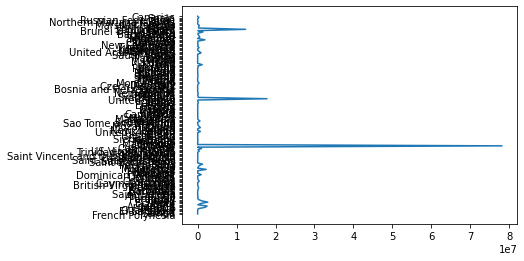

In [51]:
plt.plot(df['TotalDebrisltemsRecovered'], df['COUNTRY'])